<a href="https://colab.research.google.com/github/KeertanPatro/EDA_regression/blob/main/Seoul_bike_sharing_prediction1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# libraries for data wrangling
import numpy as np
import pandas as pd

# libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# libraries ML model implementation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Libraries for model metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score



In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
seoul_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression_Capstone project/SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
seoul_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# dataset last 5 rows
seoul_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
seoul_df.shape

(8760, 14)

This dataset has 8760 rows and 14 columns

### Dataset Information

In [ ]:
# Dataset Info
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
seoul_df[seoul_df.duplicated()]

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
seoul_df.isna().sum(axis=0)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

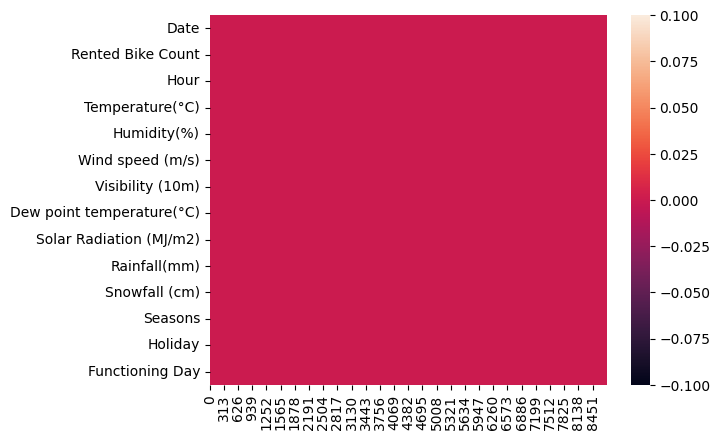

In [ ]:
# Visualizing the missing values
sns.heatmap(seoul_df.isna().transpose())
plt.show()

### What did you know about your dataset?

1. There are 8760 rows and 14 columns.  
2. From the dataset there seems to be 4 categorical variables and 10 numerical variables.  
3. No duplicates found.  
4. No null values found.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
seoul_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe

# numerical variables
seoul_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
# categorical variables

seoul_df.describe(include=['category','object'])

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Spring  No Holiday             Yes
freq            24    2208        8328            8465

### Variables Description 


*   **Date**: Date of the day.
*   **Rented Bike Count**: number of bikes that were rented.
*   **Hour**: Hour of the day.
*   **Temperature(°C)**: Temperature of the city at that hour in degree Celsius.
*   **Humidity(%)**: Humidity of the city in that hour in %.
*   **Wind speed (m/s)**: Wind speed during that hour in m/s.
*   **Visibility (10m)**: Visibility is the visibility measure.
*   **Dew point temperature(°C)**: Dew point temperature in that hour in °C.
*   **Solar Radiation (MJ/m2)**: Solar radidation in MJ / m^2.
*   **Rainfall(mm)**: Rainfall in millimeter.
*   **Snowfall (cm)**: Snowfall in centimeter.
*   **Seasons**: The current season.
*   **Holiday**: If the given day is a holiday.
*   **Functioning Day**: If the given day is a Functioning Day.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
seoul_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

# creating a copy of original 
df=seoul_df.copy()

In [ ]:
# Write your code to make your dataset analysis ready.

# converting Date column into date object

seoul_df['Date']=pd.to_datetime(seoul_df['Date'],format='%d/%m/%Y')

# extracting day, month, year from date object
seoul_df['day_of_week']=seoul_df['Date'].dt.day_name()
seoul_df['month_of_day']=seoul_df['Date'].dt.month_name()
seoul_df['Year']=seoul_df['Date'].dt.year

In [ ]:
seoul_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day day_of_week month_of_day  Year  
0             Yes      Friday     December  2017  
1             Yes      Friday     December  2017  
2             Yes      Friday     December  2017  
3             Yes      Friday     December  2017  
4             Yes      Friday     December  2017

In [ ]:
# dropping date column
seoul_df.drop(['Date'],axis=1,inplace=True)

In [ ]:
# changing 'Hour' into object
seoul_df['Hour']=seoul_df['Hour'].astype('object')
seoul_df['Year']=seoul_df['Year'].astype('object')

In [ ]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

### What all manipulations have you done and insights you found?

1. We have converted date column into date type  
2. We extracted day, month and year from the date column and dropped the date column  
3. We have converted hour column into object type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
seoul_df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week month_of_day  Year  
0      Friday     December  2017  
1      Friday     December  2017  
2      Friday     December  2017  
3      Friday     December  2017  
4      Friday     December  2017

In [ ]:
seoul_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
seoul_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

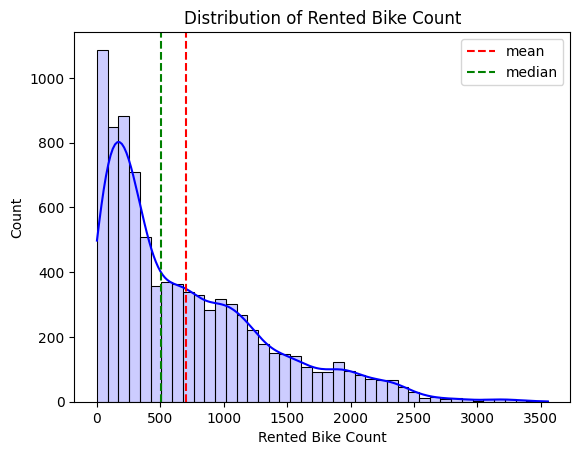

In [ ]:
# Chart - 1 visualization code

# Rented Bike Count
sns.histplot(seoul_df['Rented Bike Count'],kde=True,color='blue',alpha=0.2)
plt.axvline(seoul_df['Rented Bike Count'].mean(),color='red',linestyle='--',label='mean')
plt.axvline(seoul_df['Rented Bike Count'].median(),color='green',linestyle='--',label='median')
plt.legend()
plt.title("Distribution of Rented Bike Count")
plt.show()


##### 1. Why did you pick the specific chart?

1. Rented Bike Count is our target variable, it is important to know the distribution of our target variable in order to fit best machine learning model.

2. This chart will also help to choose how many rental bikes to be supplied.


##### 2. What is/are the insight(s) found from the chart?

The data is right skewed,i.e, mean is greater than median.  
The distribution is also sharp.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since the distribution is sharp, it gives company a good idea and easier to choose about how many how many numbers of rental bikes should be supplied. Hence this information leads to positive buisness growth.

#### Chart - 2

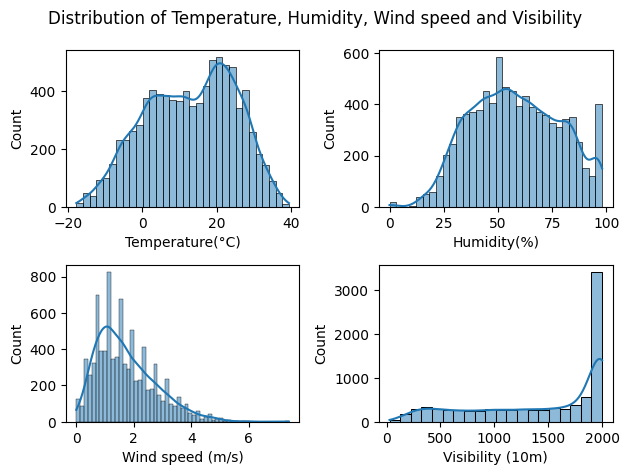

In [ ]:
# Chart - 2 visualization code
# Distribution of Temperature, Humidity, Wind speed and Visibility
features=['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)']
fig,axes=plt.subplots(2,2)
ax=axes[0][0]
sns.histplot(seoul_df[features[0]],kde=True,ax=ax)
ax=axes[0][1]
sns.histplot(seoul_df[features[1]],kde=True,ax=ax)
ax=axes[1][0]
sns.histplot(seoul_df[features[2]],kde=True,ax=ax)
ax=axes[1][1]
sns.histplot(seoul_df[features[3]],kde=True,ax=ax)
fig.suptitle("Distribution of Temperature, Humidity, Wind speed and Visibility")
fig.tight_layout()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
seoul_df.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

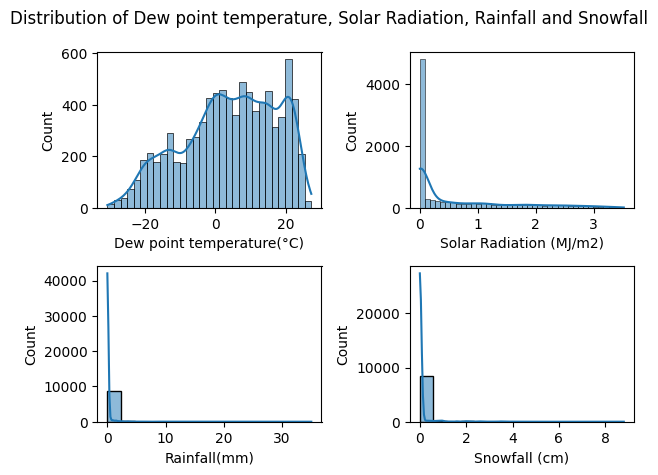

In [ ]:
# Chart - 3 visualization code
# "Distribution of Dew point temperature, Solar Radiation, Rainfall and Snowfall"
features=['Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
fig,axes=plt.subplots(2,2)
ax=axes[0][0]
sns.histplot(seoul_df[features[0]],kde=True,ax=ax)
ax=axes[0][1]
sns.histplot(seoul_df[features[1]],kde=True,ax=ax)
ax=axes[1][0]
sns.histplot(seoul_df[features[2]],kde=True,ax=ax)
ax=axes[1][1]
sns.histplot(seoul_df[features[3]],kde=True,ax=ax)
fig.suptitle("Distribution of Dew point temperature, Solar Radiation, Rainfall and Snowfall")
fig.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
seoul_df.describe(include='object').columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'day_of_week',
       'month_of_day', 'Year'],
      dtype='object')

In [ ]:
list(seoul_df['Seasons'].value_counts().index)

['Spring', 'Summer', 'Autumn', 'Winter']

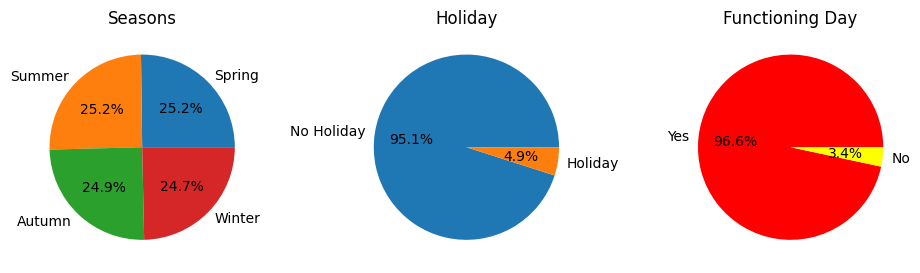

In [ ]:
# Chart - 4 visualization code
fig, axes=plt.subplots(1,3,figsize=(8,5))

# seasons
ax=axes[0]
ax.pie(seoul_df['Seasons'].value_counts(),labels=list(seoul_df['Seasons'].value_counts().index),autopct='%.1f%%')
ax.set_title("Seasons")
# Holiday
ax=axes[1]
ax.pie(seoul_df['Holiday'].value_counts(),labels=list(seoul_df['Holiday'].value_counts().index),autopct='%.1f%%')
ax.set_title("Holiday")
# Functioning day
ax=axes[2]
ax.pie(seoul_df['Functioning Day'].value_counts(),labels=list(seoul_df['Functioning Day'].value_counts().index),autopct='%.1f%%',colors=['red','yellow'])
ax.set_title("Functioning Day")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
seoul_df.describe(include='object').columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'day_of_week',
       'month_of_day', 'Year'],
      dtype='object')

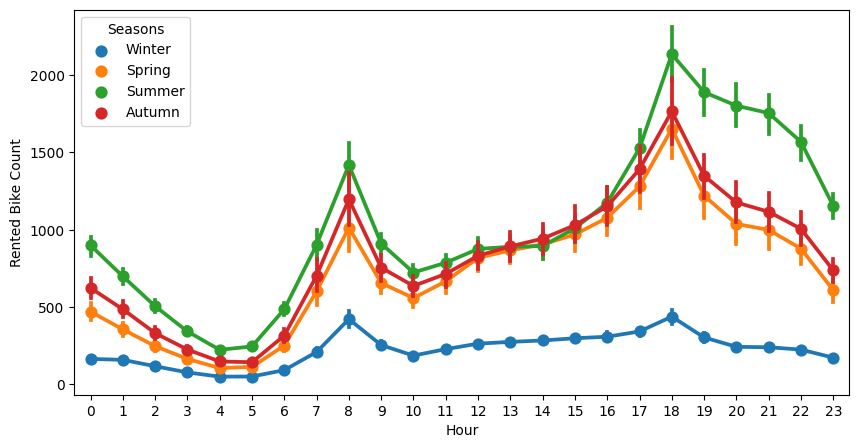

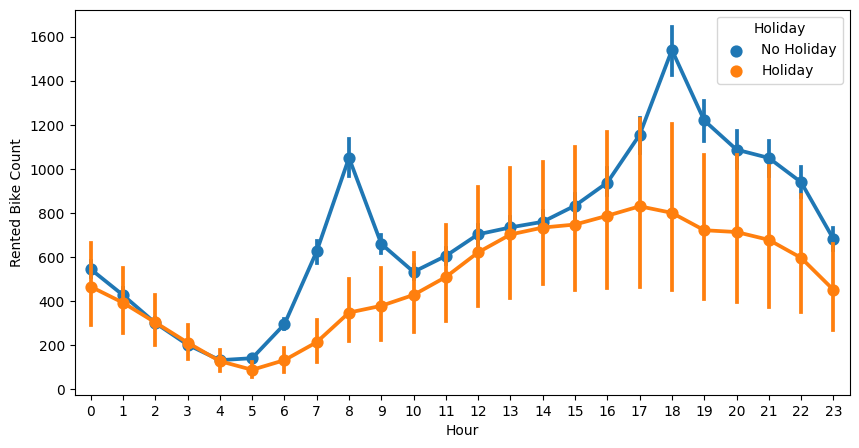

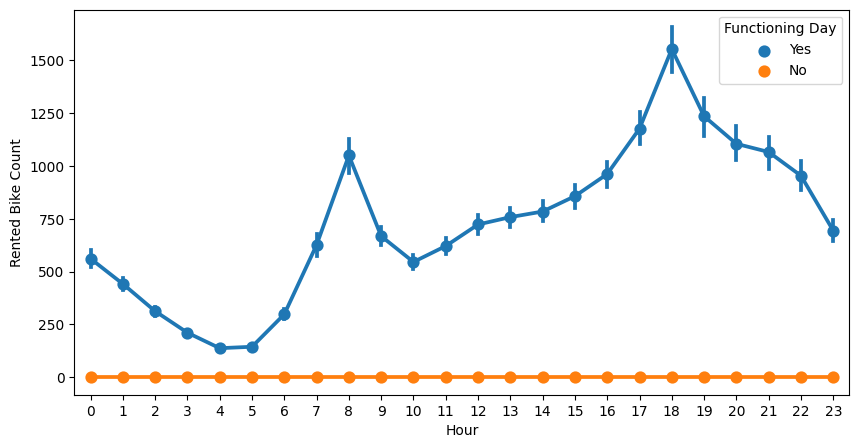

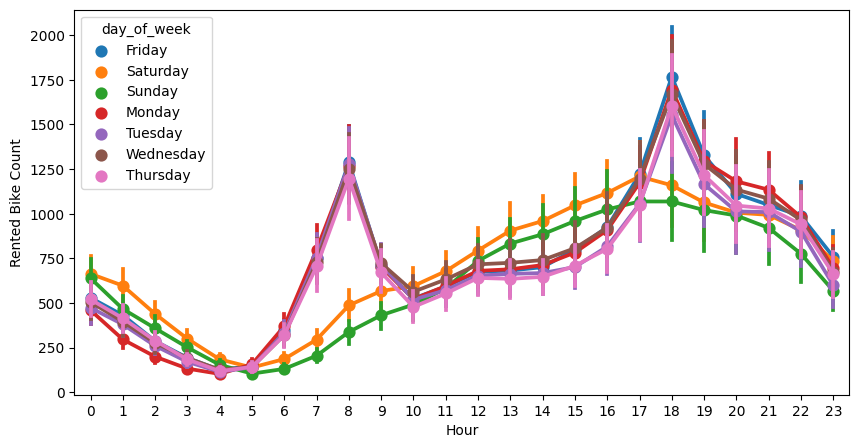

In [ ]:
# Chart - 5 visualization code
hue_list=['Seasons','Holiday','Functioning Day','day_of_week']
for i in hue_list:
  plt.figure(figsize=(10,5))
  sns.pointplot(x=seoul_df['Hour'],y=seoul_df['Rented Bike Count'],hue=seoul_df[i])

In [ ]:
# converting days into week and weekends
seoul_df['day_of_week']=seoul_df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')

In [ ]:
seoul_df['day_of_week'].value_counts()

Weekday    6264
Weekend    2496
Name: day_of_week, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
seoul_df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week month_of_day  Year  
0     Weekday     December  2017  
1     Weekday     December  2017  
2     Weekday     December  2017  
3     Weekday     December  2017  
4     Weekday     December  2017

In [ ]:
seoul_df[seoul_df['Holiday']=='Holiday']['month_of_day'].value_counts()

December     96
February     72
September    72
May          48
October      48
January      24
March        24
June         24
August       24
Name: month_of_day, dtype: int64

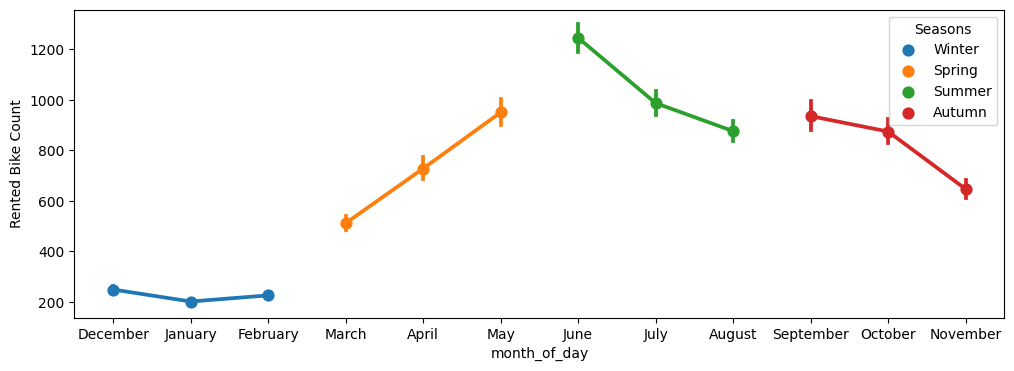

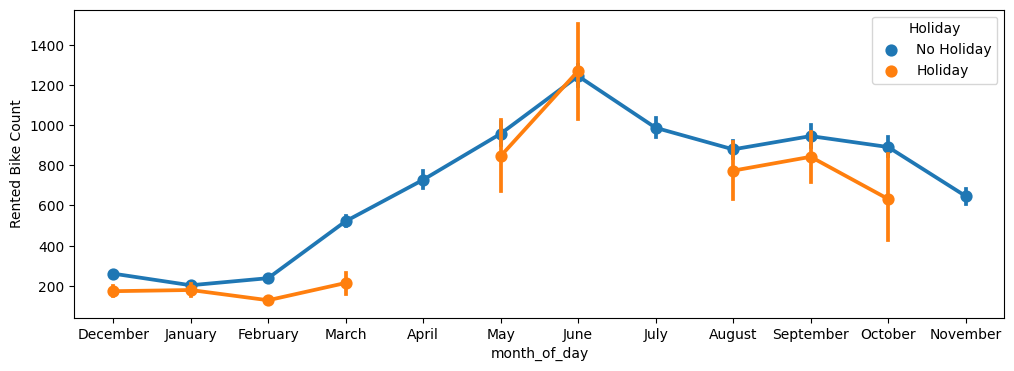

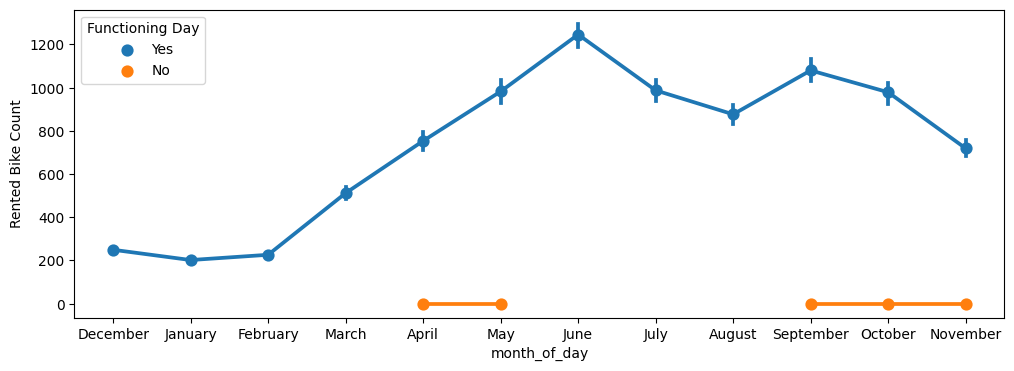

In [ ]:
# Chart - 6 visualization code
hue_list=['Seasons','Holiday','Functioning Day']
for i in hue_list:
  plt.figure(figsize=(12,4))
  sns.pointplot(x=seoul_df['month_of_day'],y=seoul_df['Rented Bike Count'],hue=seoul_df[i])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

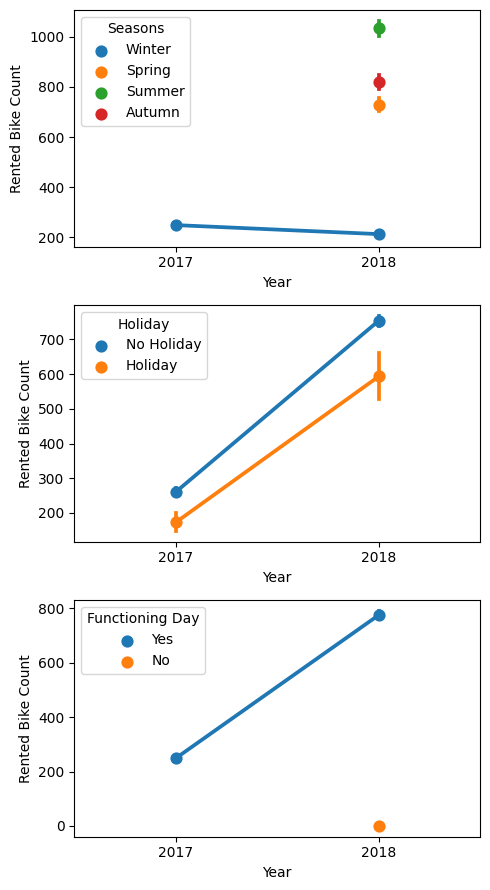

In [ ]:
# Chart - 7 visualization code
hue_list=['Seasons','Holiday','Functioning Day']
plt.figure(figsize=(5,9))
for k,i in enumerate(hue_list):
  plt.subplot(3,1,k+1)
  sns.pointplot(x=seoul_df['Year'],y=seoul_df['Rented Bike Count'],hue=seoul_df[i])
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
seoul_df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week month_of_day  Year  
0     Weekday     December  2017  
1     Weekday     December  2017  
2     Weekday     December  2017  
3     Weekday     December  2017  
4     Weekday     December  2017

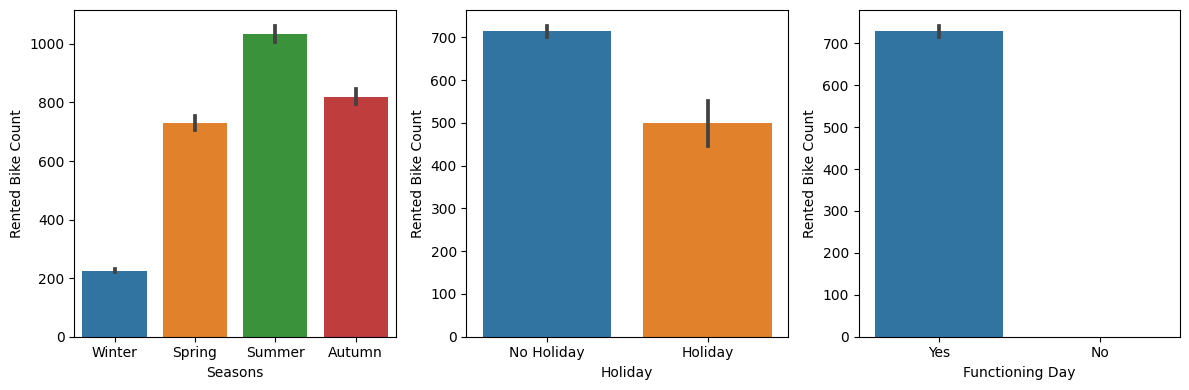

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(x=seoul_df['Seasons'],y=seoul_df['Rented Bike Count'])
plt.subplot(1,3,2)
sns.barplot(x=seoul_df['Holiday'],y=seoul_df['Rented Bike Count'])
plt.subplot(1,3,3)
sns.barplot(x=seoul_df['Functioning Day'],y=seoul_df['Rented Bike Count'])
plt.tight_layout()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
seoul_df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week month_of_day  Year  
0     Weekday     December  2017  
1     Weekday     December  2017  
2     Weekday     December  2017  
3     Weekday     December  2017  
4     Weekday     December  2017

In [ ]:
seoul_df.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

<Figure size 900x500 with 0 Axes>

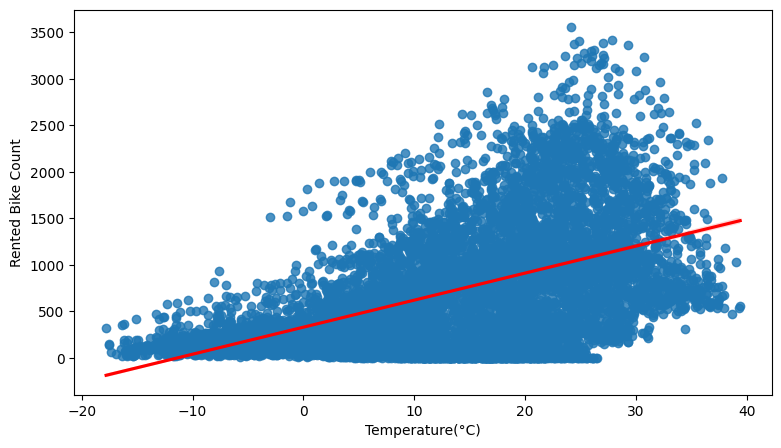

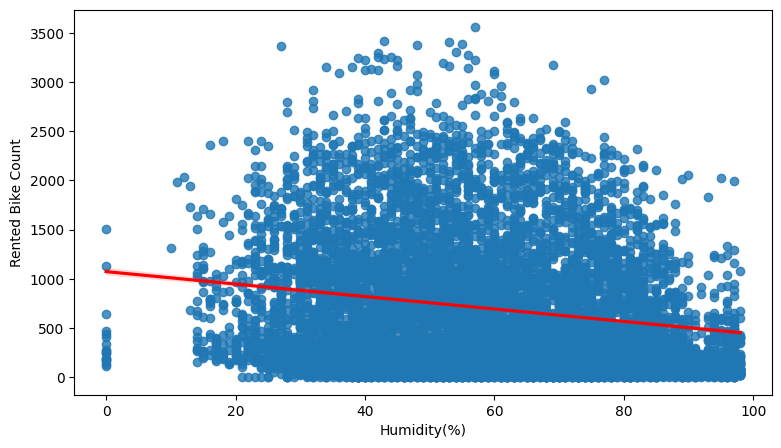

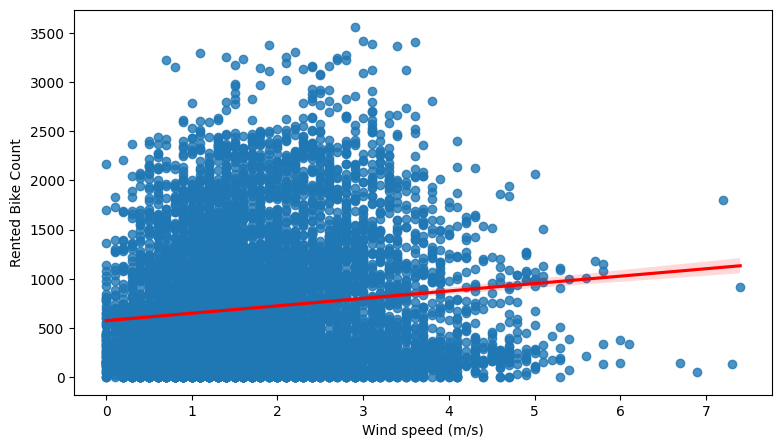

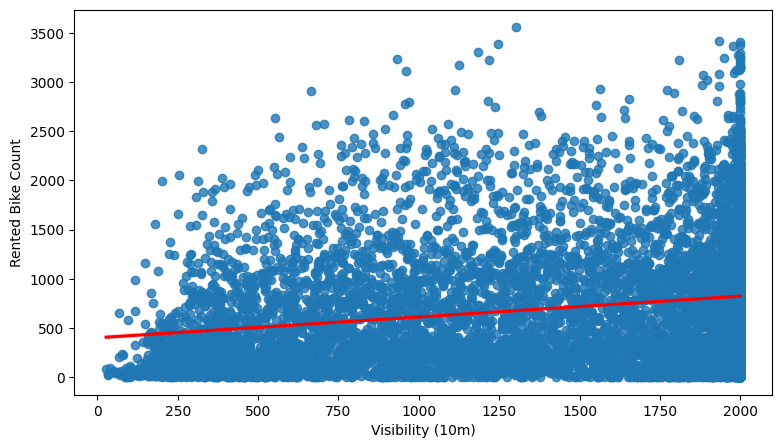

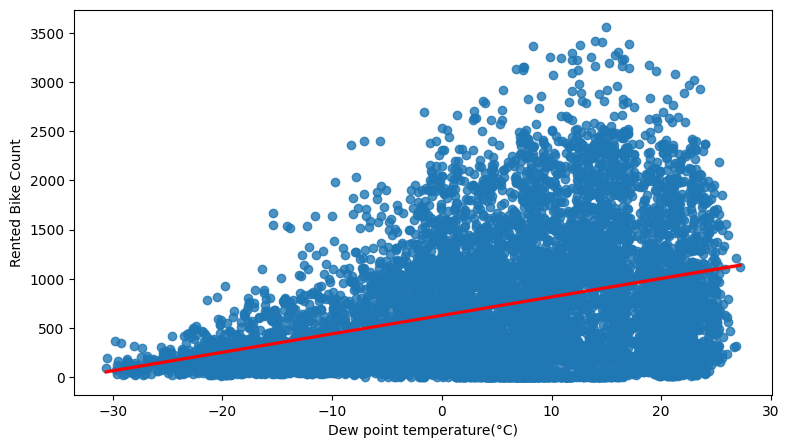

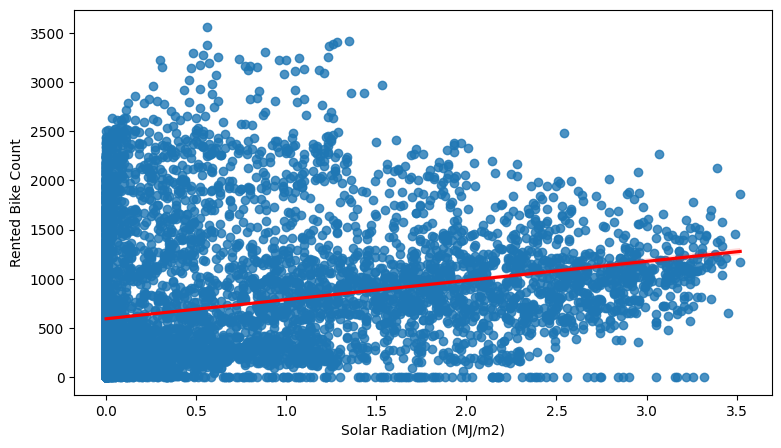

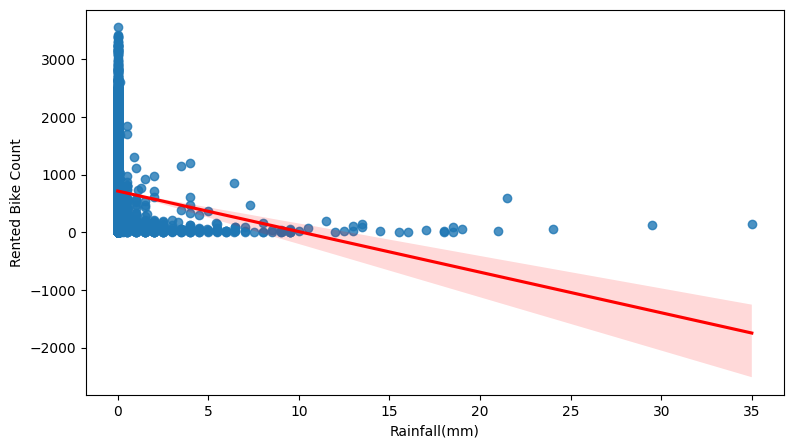

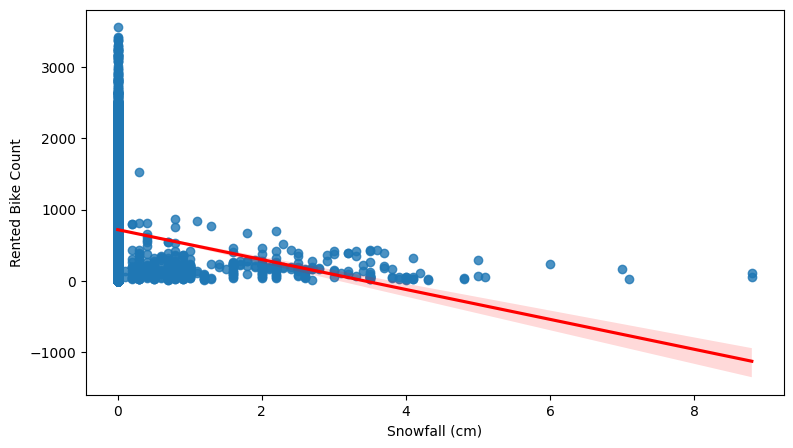

In [ ]:
# Chart - 9 visualization code
num_features = list(seoul_df.describe().columns)
for features in num_features:
  plt.figure(figsize=(9,5))
  if features!='Rented Bike Count':
    sns.regplot(x=seoul_df[features] , y=seoul_df['Rented Bike Count'],line_kws={"color": "red"})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
seoul_df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week month_of_day  Year  
0     Weekday     December  2017  
1     Weekday     December  2017  
2     Weekday     December  2017  
3     Weekday     December  2017  
4     Weekday     December  2017

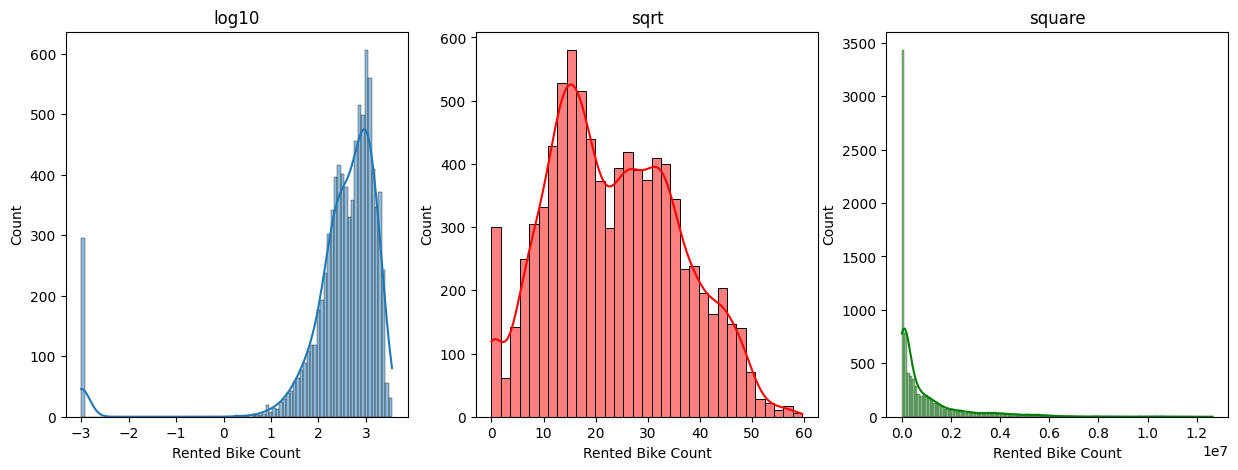

In [ ]:
# Chart - 10 visualization code
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(np.log10(seoul_df['Rented Bike Count']+0.001),kde=True,ax=ax[0])
ax[0].set_title('log10')
sns.histplot(np.sqrt(seoul_df['Rented Bike Count']),kde=True,ax=ax[1],color='red')
ax[1].set_title('sqrt')
sns.histplot(np.square(seoul_df['Rented Bike Count']),kde=True,ax=ax[2],color='green')
ax[2].set_title('square')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

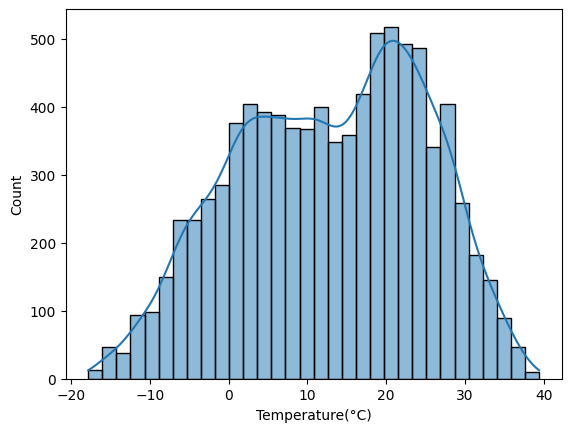

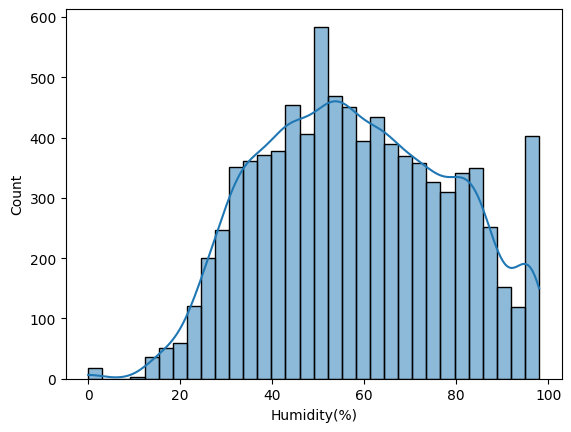

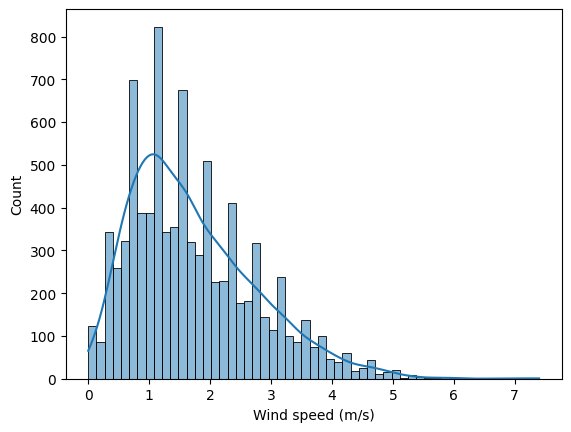

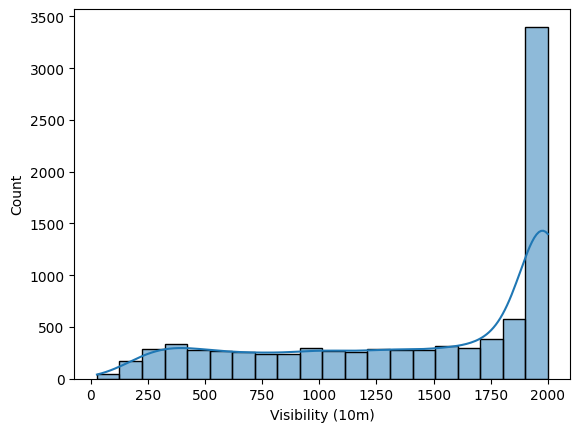

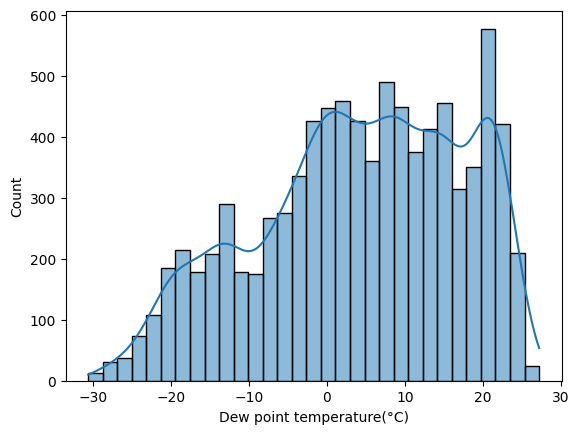

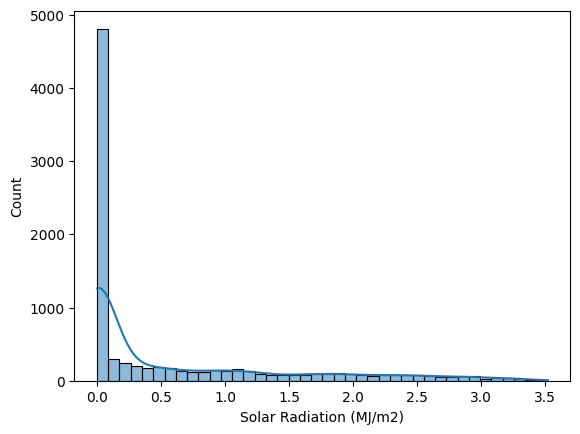

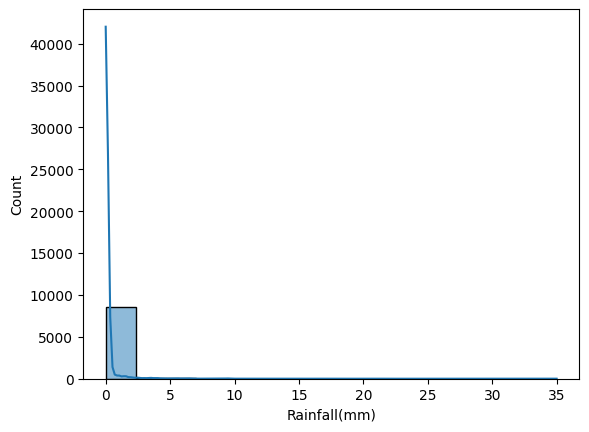

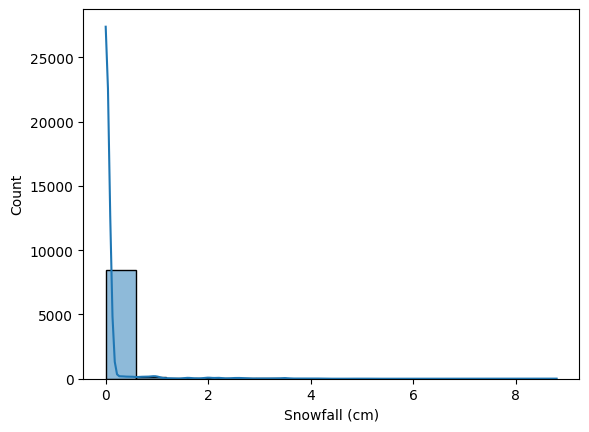

In [ ]:
# Chart - 11 visualization code
# Distribution of numerical columns after standardizing
from scipy.stats import zscore
df_1=seoul_df.copy()
df_1[num_features].apply(zscore)
for features in num_features:
  if features!='Rented Bike Count':
    plt.figure()
    sns.histplot(df_1[features],kde=True)



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
seoul_df.shape

(8760, 16)

In [ ]:
num_features

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
seoul_df.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

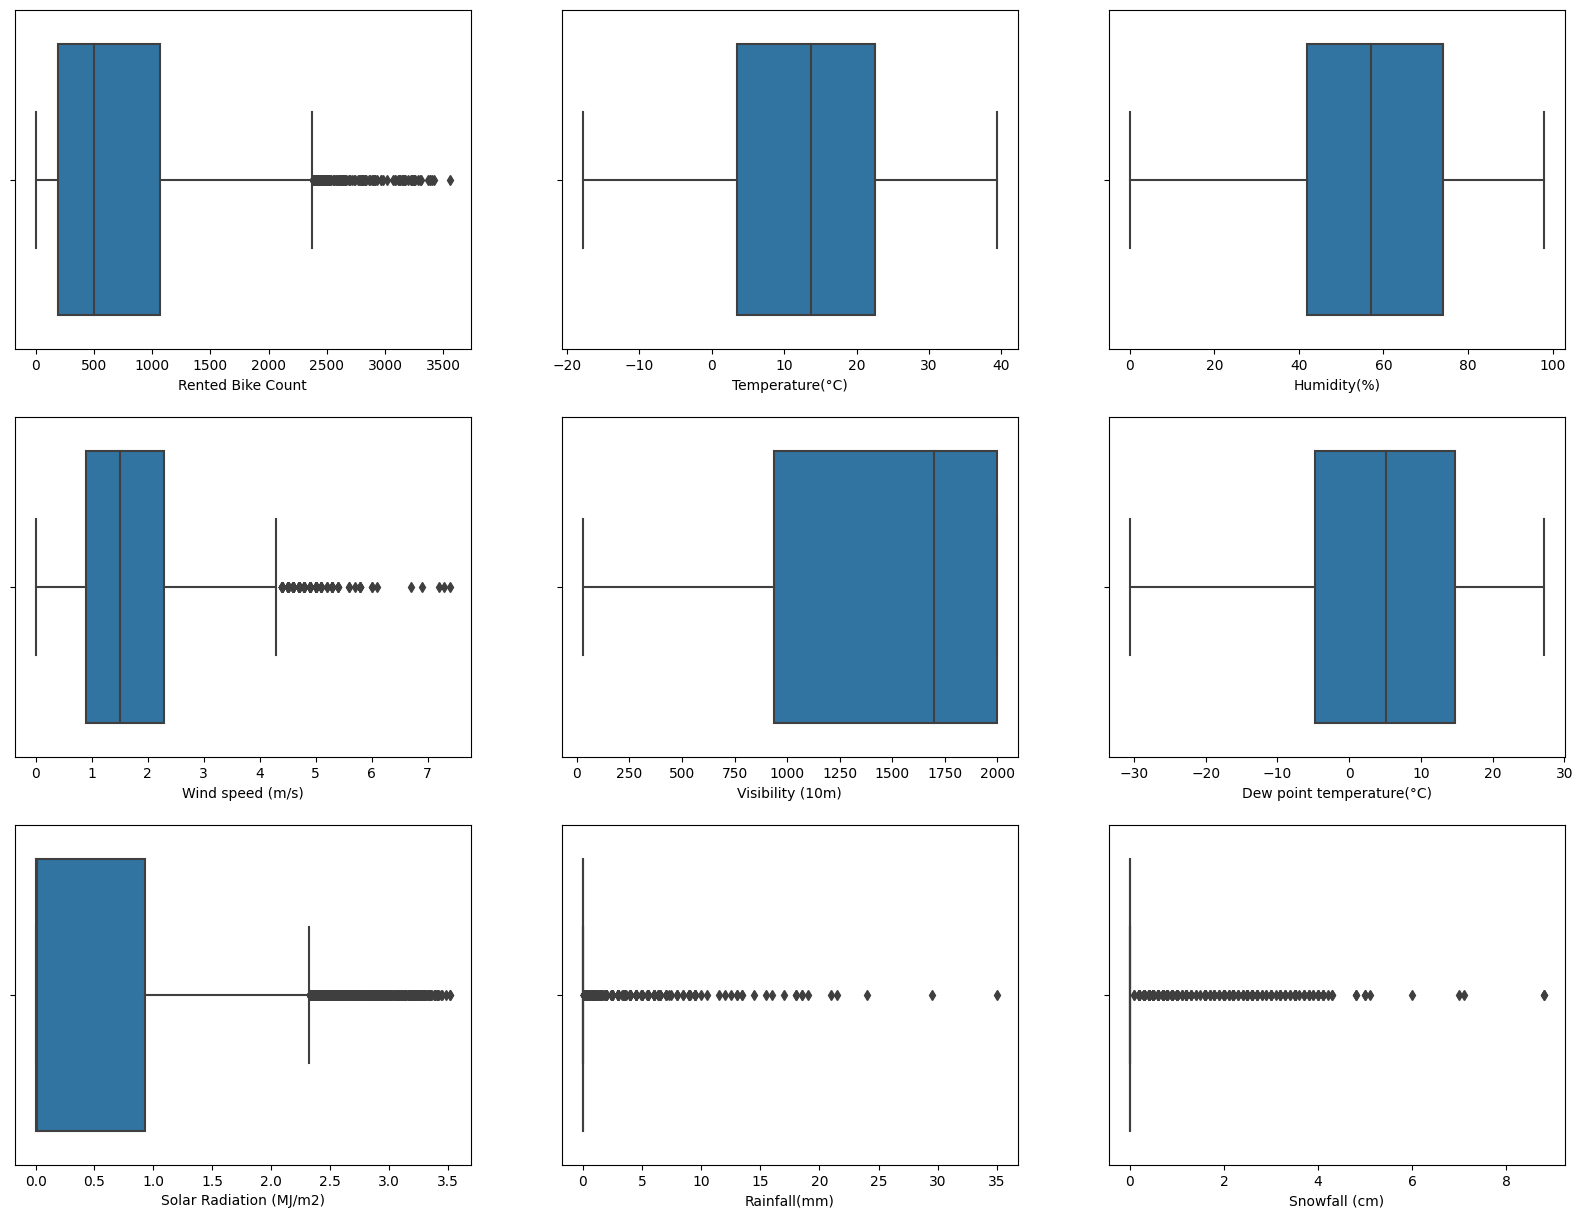

In [ ]:
# Chart - 12 visualization code
# looking for some outliers
plt.figure(figsize=(20,15))
for i,features in enumerate(num_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=seoul_df[features])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

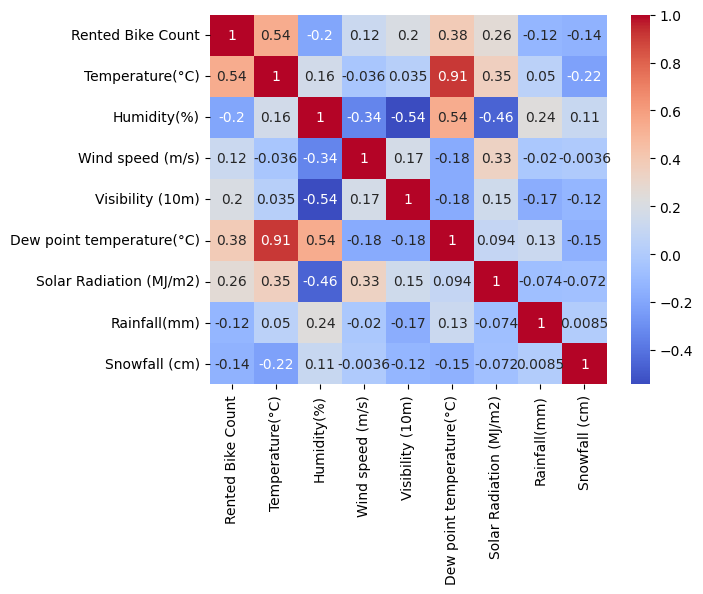

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(seoul_df.corr(),cmap='coolwarm',annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

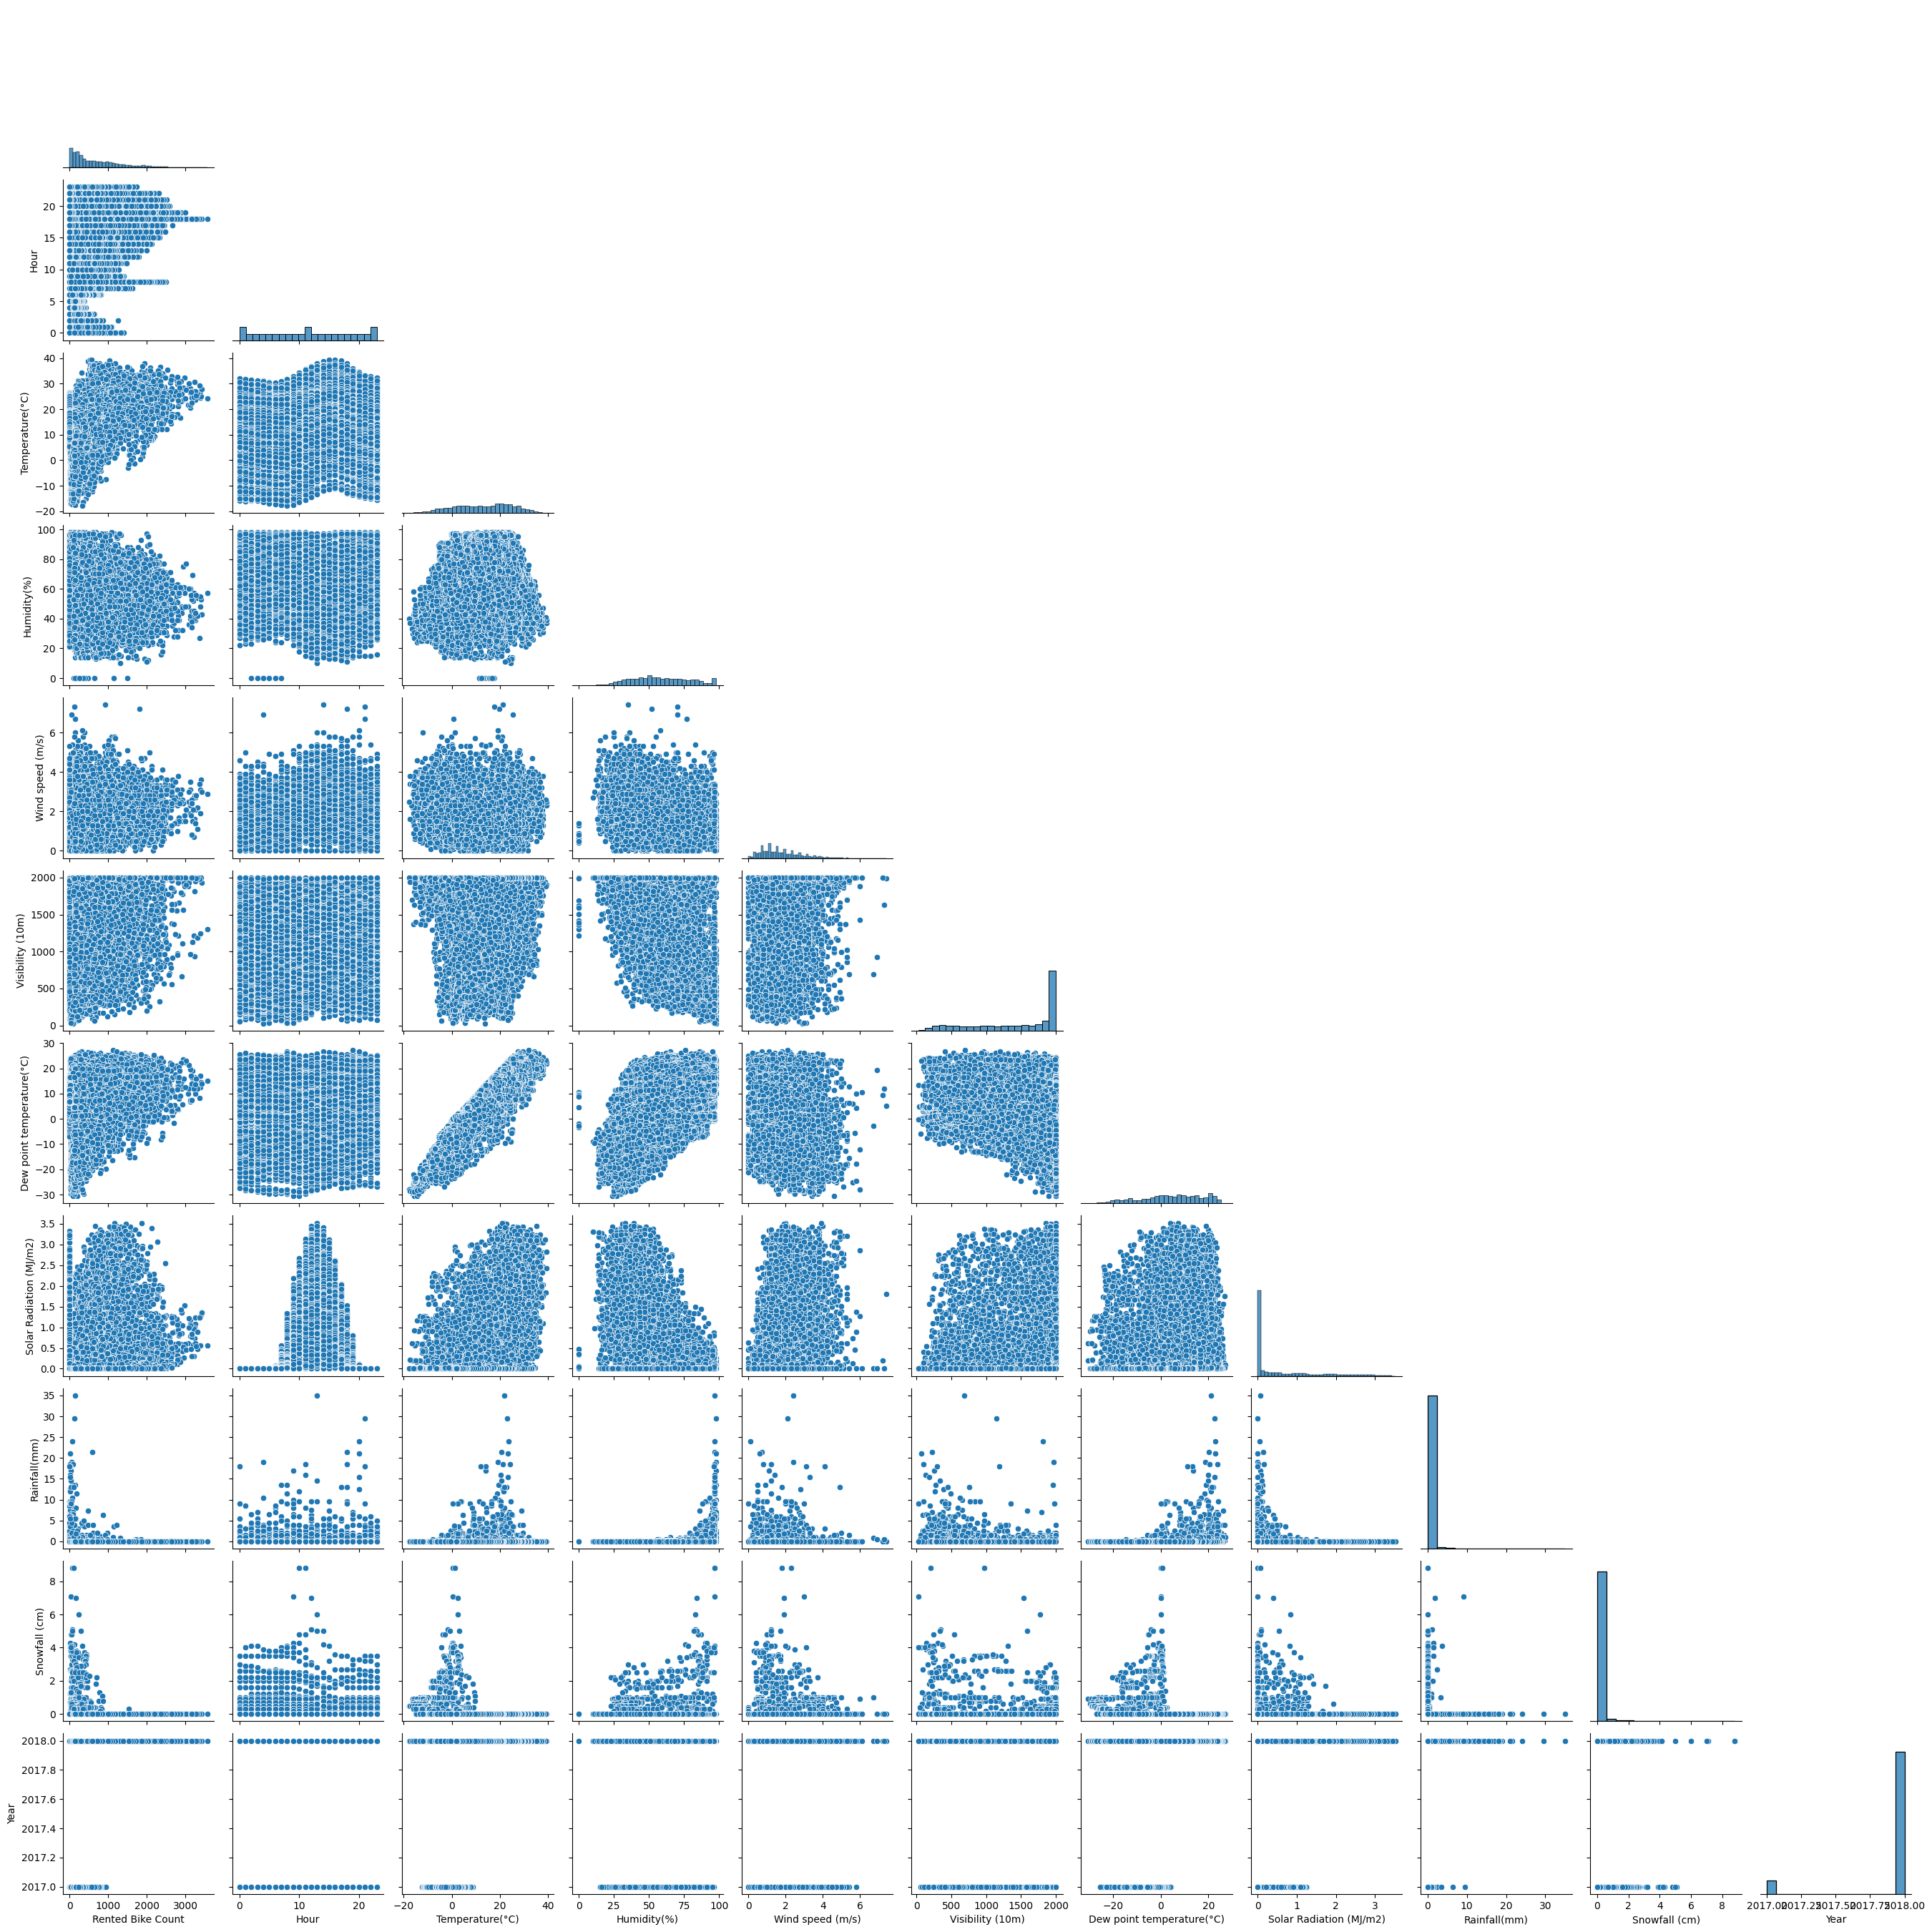

In [ ]:
# Pair Plot visualization code
sns.pairplot(seoul_df,corner=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
seoul_df1=seoul_df.copy()

In [ ]:
seoul_df1.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
seoul_df1.shape

(8760, 16)

In [ ]:
# Handling Outliers & Outlier treatments

# removing outliers for windspeed
Q1=seoul_df1['Wind speed (m/s)'].quantile(0.25)
Q3=seoul_df1['Wind speed (m/s)'].quantile(0.75)
IQR=Q3-Q1
seoul_df1=seoul_df1[~((seoul_df1['Wind speed (m/s)']>(Q3+1.5*IQR))|(seoul_df1['Wind speed (m/s)']<(Q1-1.5*IQR)))]



<Axes: >

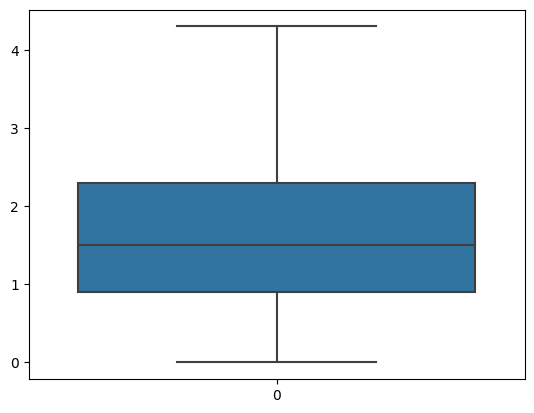

In [ ]:
sns.boxplot(seoul_df1['Wind speed (m/s)'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

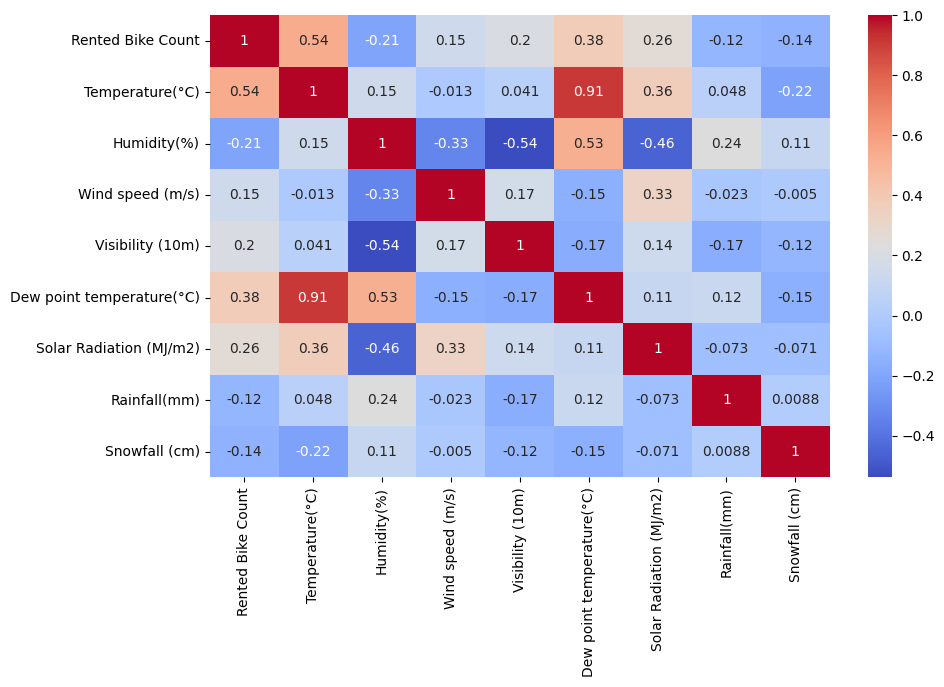

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize=(10,6))
sns.heatmap(seoul_df1.corr(),cmap='coolwarm',annot=True)

We see that Temperature and Dew point temperature are highly correlated variables.We need to run VIF method to further check on multicollinearity.

In [ ]:
# VIF checking
# creating a function for calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
  return vif


In [ ]:
cols=[col for col in seoul_df1.describe().columns if col not in ['Rented Bike Count']]
X=seoul_df1[cols]
calc_vif(X)

variables        VIF
0            Temperature(°C)  29.558941
1                Humidity(%)   5.164831
2           Wind speed (m/s)   4.843949
3           Visibility (10m)   8.952839
4  Dew point temperature(°C)  15.304549
5    Solar Radiation (MJ/m2)   2.783182
6               Rainfall(mm)   1.078632
7              Snowfall (cm)   1.117790

We See that Temperature and Dew point temperature have high VIF values, let us remove Dew point temperature.

In [ ]:
calc_vif(seoul_df1[[col for col in seoul_df1.describe().columns if col not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.188142
1              Humidity(%)  4.824023
2         Wind speed (m/s)  4.330114
3         Visibility (10m)  4.432786
4  Solar Radiation (MJ/m2)  2.222851
5             Rainfall(mm)  1.077214
6            Snowfall (cm)  1.117785

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# important numerical features 
num_features=[col for col in seoul_df1.describe().columns if col not in ['Dew point temperature(°C)']]
num_features
# important categorical features
cat_features=list(seoul_df.describe(include='object').columns)
cat_features

['Hour',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'day_of_week',
 'month_of_day',
 'Year']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

In [ ]:
seoul_df1

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254    0             -5.2           37               2.2   
1                   204    1             -5.5           38               0.8   
2                   173    2             -6.0           39               1.0   
3                   107    3             -6.2           40               0.9   
4                    78    4             -6.0           36               2.3   
...                 ...  ...              ...          ...               ...   
8755               1003   19              4.2           34               2.6   
8756                764   20              3.4           37               2.3   
8757                694   21              2.6           39               0.3   
8758                712   22              2.1           41               1.0   
8759                584   23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0              0.0            0.0  Winter  No Holiday             Yes   
1              0.0            0.0  Winter  No Holiday             Yes   
2              0.0            0.0  Winter  No Holiday             Yes   
3              0.0            0.0  Winter  No Holiday             Yes   
4              0.0            0.0  Winter  No Holiday             Yes   
...            ...            ...     ...         ...             ...   
8755           0.0            0.0  Autumn  No Holiday             Yes   
8756           0.0            0.0  Autumn  No Holiday             Yes   
8757           0.0            0.0  Autumn  No Holiday             Yes   
8758           0.0            0.0  Autumn  No Holiday             Yes   
8759           0.0            0.0  Autumn  No Holiday             Yes   

     day_of_week month_of_day  Year  
0        Weekday     December  2017  
1        Weekday     December  2017  
2        Weekday     December  2017  
3        Weekday     December  2017  
4        Weekday     December  2017  
...          ...          ...   ...  
8755     Weekday     November  2018  
8756     Weekday     November  2018  
8757     Weekday     November  2018  
8758     Weekday     November  2018  
8759     Weekday     November  2018  

[8599 rows x 16 columns]

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# use one hot encoding to all categorical columns
df=pd.get_dummies(seoul_df1,columns=cat_features,drop_first=True)
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'day_of_week_Weekend', 'month_of_day_August', 'month_of_day_December',
       'month_of_day_February', 'month_of_day_January', 'month_of_day_July',
       'month_of_day_June', 'month_of_day_March', 'month_of_day_May',
       'month_of_day_November', 'month_of_day_October',
       'month_of_day_September', 'Year_2018'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.





One Hot encoding

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
y=np.sqrt(df['Rented Bike Count'])

Sqrt transformation to the dependent variable. 

### 6. Data Scaling

In [ ]:
# Scaling your data

# standardising
from sklearn.preprocessing import StandardScaler
# creating dependent and independent variable
X=df.drop('Rented Bike Count',axis=1)
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [ ]:
X.shape

(8599, 49)

In [ ]:
seoul_df.shape

(8760, 16)

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

### Linear Regression

In [ ]:
# ML Model - 1 Implementation
# Linear regression
l_reg=LinearRegression()

# Fit the Algorithm
l_reg.fit(X_train,y_train)

# Predict on the model
y_pred_tr=l_reg.predict(X_train)
y_pred_tst=l_reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different performance metric

# MSE
MSE_tr=mean_squared_error(y_train,y_pred_tr)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test,y_pred_tst)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train,y_pred_tr)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test,y_pred_tst)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train,y_pred_tr)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test,y_pred_tst)
print("r2 score for test is:",r2_tst)
# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train, y_pred_tr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test, y_pred_tst))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)



MSE of train data is: 34.62756786614749
MSE of test data is: 33.49279133781508
MAE of train data is: 4.463640191363978
MAE of test data is: 4.3621623589932215
RMSE of train data is: 5.88451934028154
RMSE of test data is: 5.787295684325718
r2 score for train is: 0.7776768187960084
r2 score for test is: 0.7849969655976173
The adjusted r2 score for train data is: 0.7759743909355621
The adjusted r2 score for test data is: 0.7799802281282284


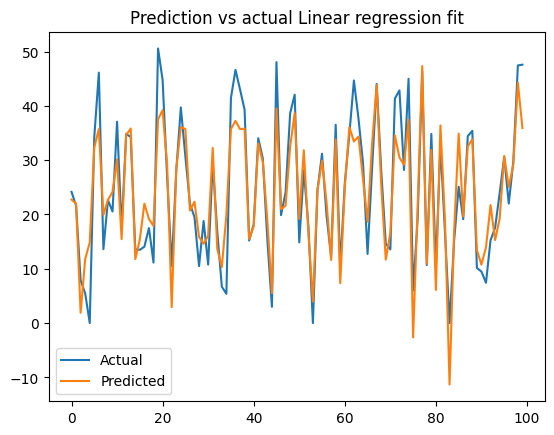

In [ ]:
# Visualizing evaluation Metric Score chart
plt.plot(np.array(y_test)[:100],label="Actual")
plt.plot(y_pred_tst[:100],label="Predicted")
plt.legend()
plt.title("Prediction vs actual Linear regression fit")
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
X_train.shape

(6449, 49)

In [ ]:
# cross validation using linear regression
from sklearn.model_selection import ShuffleSplit
lr=LinearRegression()
lr.fit(X,y)
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
lr_cross_validated=(cross_val_score(lr,X,y,cv=cv))
print("The mean r2 score for 5 different sets is:",lr_cross_validated)
#print("r2",r2_score(y,yp))
# Fit the Algorithm

# Predict on the model

The mean r2 score for 5 different sets is: [0.78627877 0.77198578 0.790607   0.760968   0.7834416 ]


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### Ridge Regression

#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# instantiating a model object
ridge=Ridge() 
# setting hyperparameters
param_grid = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# instantiating a GridSearchcv object for the model
ridge_grid=GridSearchCV(estimator=ridge,param_grid=param_grid,scoring='r2',cv=5)

# fitting the model across various grids
ridge_grid.fit(X_train,y_train)

# finding the optimal model
ridge_optimal=ridge_grid.best_estimator_

# displaying the best parameters for the model
print("The best parameters are:",ridge_grid.best_params_)

# predicting train and test data
y_ridge_tr=ridge_optimal.predict(X_train)
y_ridge_tst=ridge_optimal.predict(X_test)



The best parameters are: {'alpha': 30}


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different perfomence metric

# MSE
MSE_tr=mean_squared_error(y_train,y_ridge_tr)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test,y_ridge_tst)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train,y_ridge_tr)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test,y_ridge_tst)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train,y_ridge_tr)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test,y_ridge_tst)
print("r2 score for test is:",r2_tst)
# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train, y_ridge_tr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test, y_ridge_tst))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)


MSE of train data is: 34.65682455313277
MSE of test data is: 33.505526554313526
MAE of train data is: 4.468882447517535
MAE of test data is: 4.369234874912246
RMSE of train data is: 5.8870047182869465
RMSE of test data is: 5.788395853283838
r2 score for train is: 0.7774889788718415
r2 score for test is: 0.7849152133732858
The adjusted r2 score for train data is: 0.7757851126372299
The adjusted r2 score for test data is: 0.7798965683519958


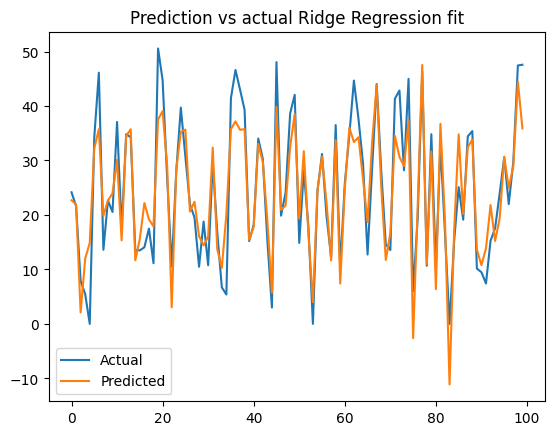

In [ ]:
# Visualizing evaluation Metric Score chart

plt.plot(np.array(y_test)[:100],label="Actual")
plt.plot(y_ridge_tst[:100],label="Predicted")
plt.legend()
plt.title("Prediction vs actual Ridge Regression fit")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### Lasso Regression

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# instantiating a model object
lasso=Lasso() 
# setting hyperparameters
param_grid = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# instantiating a GridSearchcv object for the model
lasso_grid=GridSearchCV(estimator=lasso,param_grid=param_grid,scoring='r2',cv=5)

# fitting the model across various grids
lasso_grid.fit(X_train,y_train)

# finding the optimal model
lasso_optimal=lasso_grid.best_estimator_

# displaying the best parameters for the model
print("The best parameters are:",lasso_grid.best_params_)

# predicting train and test data
y_lasso_tr=lasso_optimal.predict(X_train)
y_lasso_tst=lasso_optimal.predict(X_test)

The best parameters are: {'alpha': 0.001}


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different perfomence metric

# MSE
MSE_tr=mean_squared_error(y_train,y_lasso_tr)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test,y_lasso_tst)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train,y_lasso_tr)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test,y_lasso_tst)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train,y_lasso_tr)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test,y_ridge_tst)
print("r2 score for test is:",r2_tst)
# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train, y_lasso_tr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test, y_lasso_tst))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)


MSE of train data is: 34.62775750250603
MSE of test data is: 33.49165059321205
MAE of train data is: 4.4634490301863945
MAE of test data is: 4.361933538645862
RMSE of train data is: 5.884535453415675
RMSE of test data is: 5.787197127557696
r2 score for train is: 0.7776756012528454
r2 score for test is: 0.7849152133732858
The adjusted r2 score for train data is: 0.7759731640691275
The adjusted r2 score for test data is: 0.7799877218711293


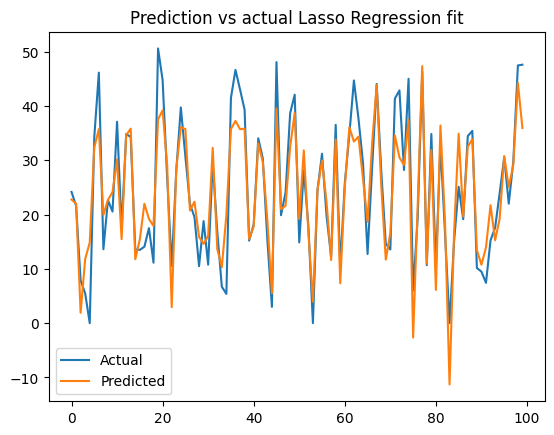

In [ ]:
# Visualizing prediction and actual

plt.plot(np.array(y_test)[:100],label="Actual")
plt.plot(y_lasso_tst[:100],label="Predicted")
plt.legend()
plt.title("Prediction vs actual Lasso Regression fit")
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### Polynomial Regression

In [ ]:
# instantiating polynomial features
poly=PolynomialFeatures(degree=2)

# creating all combinations of features upto degree 4
X_poly_tr=poly.fit_transform(X_train)   #train data 
X_poly_tst=poly.fit_transform(X_test)   # test data 

# Fit the Algorithm
poly_reg=LinearRegression()
poly_reg.fit(X_poly_tr,y_train)

# Predict on the model
y_poly_tr=poly_reg.predict(X_poly_tr)
y_poly_tst=poly_reg.predict(X_poly_tst)


#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# finding best score using cross validation
X_poly=poly.fit_transform(X)

# shuffling data
cv=ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)

# finding mean of all scores
cross_val=np.mean(cross_val_score(poly_reg,X_poly,y,cv=cv,scoring='r2'))
print("The mean score for 5 fold cv is:",cross_val)

The mean score for 5 fold cv is: 0.8970768361978599


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different perfomence metric

# MSE
MSE_tr=mean_squared_error(y_train,y_poly_tr)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test,y_poly_tst)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train,y_poly_tr)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test,y_poly_tst)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train,y_poly_tr)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test,y_poly_tst)
print("r2 score for test is:",r2_tst)
# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train, y_poly_tr))*((X_poly_tr.shape[0]-1)/(X_poly_tr.shape[0]-X_poly_tr.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test, y_poly_tst))*((X_poly_tst.shape[0]-1)/(X_poly_tst.shape[0]-X_poly_tst.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)

MSE of train data is: 10.695906943864825
MSE of test data is: 12.457537213031138
MAE of train data is: 2.1772849628682853
MAE of test data is: 2.410031584631431
RMSE of train data is: 3.270459745030479
RMSE of test data is: 3.529523652425514
r2 score for train is: 0.931327892654378
r2 score for test is: 0.9200303051791854
The adjusted r2 score for train data is: 0.9144021364460524
The adjusted r2 score for test data is: 0.8033697091877224


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

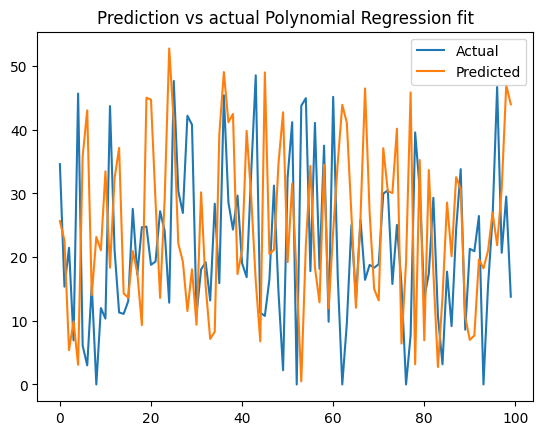

In [ ]:
plt.plot(np.array(y_train)[:100],label="Actual")
plt.plot(y_poly_tst[:100],label="Predicted")
plt.legend()
plt.title("Prediction vs actual Polynomial Regression fit")
plt.show()

### Decision Trees

In [ ]:
# ML Model - 3 Implementation


# Fit the Algorithm

# Predict on the model

#### 1. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

### Random Forest

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***